In [2]:
import keras, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, tqdm
import os.path
%matplotlib inline

In [68]:
import sklearn

In [3]:
datadir = os.path.join(os.path.expanduser('~'), 'data2', 'behavioralCloning', 'data_provided')

In [6]:
data = np.load(os.path.join(datadir, 'XY.npz'))
X = data['X']
Y = data['Y']

In [7]:
X.shape, Y.shape

((1000, 160, 320, 3, 3), (1000, 3))

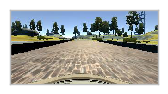

In [17]:
center = X[..., 0]
center.shape
fig,ax=plt.subplots(figsize=(2,1));
ax.imshow(center[0])
ax.set_xticks([]); ax.set_yticks([]);

Define a simple model.

In [112]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=center.shape[1:]))
model.add(keras.layers.Conv2D(6, 3, activation='relu'))
model.add(keras.layers.Conv2D(6, 3, activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(12, 3, activation='relu'))
model.add(keras.layers.Conv2D(12, 3, activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(24, 3, activation='relu'))
model.add(keras.layers.Conv2D(24, 3, activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())
nconvout = model.layers[-1].output_shape[-1]
print('%d conv outputs' % nconvout)

# model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(Y.shape[-1], activation='linear'))

model.summary()

3072 conv outputs
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 158, 318, 6)       168       
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 156, 316, 6)       330       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 78, 158, 6)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 76, 156, 12)       660       
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 74, 154, 12)       1308      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 37, 77, 12)        0  

In [113]:
model.compile(
    loss='mse',
    optimizer='nadam',
    metrics=['accuracy'],
)

In [114]:
import sklearn.model_selection

In [115]:
%%time
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(center, Y)
X_valid, X_test, Y_valid, Y_test = sklearn.model_selection.train_test_split(X_valid, Y_valid)
X_train.shape, X_valid.shape, X_test.shape

CPU times: user 0 ns, sys: 4.94 s, total: 4.94 s
Wall time: 4.9 s


In [116]:
class TqdmCallback(keras.callbacks.Callback):
    def __init__(self, nbatch):
        self.pbar = tqdm. tqdm_notebook(total=nbatch, unit='epoch')
    
    def on_train_begin(self, logs={}):
        pass

    def on_epoch_end(self, epoch, logs={}):
        self.pbar.update()
        print(epoch, logs)

In [117]:
NEPOCH = 300

In [119]:
import time
model.fit(
    X_train, Y_train, 
    epochs=NEPOCH,
    validation_data=(X_valid, Y_valid), 
    callbacks=[
        TqdmCallback(NEPOCH),
        keras.callbacks.TensorBoard(
            log_dir='/home/tsbertalan/tensorboardlogs/behavClon/%s/'% time.time(),
            #batch_size=32, 
            write_graph=True, 
        ),
    ],
    verbose=0
)

A Jupyter Widget

0 {'loss': 0.00048207789589650929, 'val_acc': 0.97326203527297561, 'val_loss': 0.0080483811807863532, 'acc': 0.96666666666666667}
1 {'loss': 0.00041592543137570223, 'val_acc': 0.97326203527297561, 'val_loss': 0.0079670073115889403, 'acc': 0.95466666666666666}
2 {'loss': 0.00031551547193278868, 'val_acc': 0.97326203527297561, 'val_loss': 0.0080738461471815161, 'acc': 0.96533333396911625}
3 {'loss': 0.00035835165165675181, 'val_acc': 0.97860962885586333, 'val_loss': 0.0080335541618340479, 'acc': 0.96133333396911624}
4 {'loss': 0.00031883304775692523, 'val_acc': 0.97326203527297561, 'val_loss': 0.0081212158653546467, 'acc': 0.96399999999999997}
5 {'loss': 0.00033196840574964881, 'val_acc': 0.97860962885586333, 'val_loss': 0.0079123295973089931, 'acc': 0.96399999999999997}
6 {'loss': 0.00038857026025652887, 'val_acc': 0.97326203527297561, 'val_loss': 0.0083071089344706767, 'acc': 0.96266666666666667}
7 {'loss': 0.00042616635312636692, 'val_acc': 0.97860962885586333, 'val_loss': 0.007996448

63 {'loss': 0.00048979125653083125, 'val_acc': 0.967914441690088, 'val_loss': 0.0085724564368791761, 'acc': 0.95866666666666667}
64 {'loss': 0.00041024387845148643, 'val_acc': 0.97326203527297561, 'val_loss': 0.008469830994260184, 'acc': 0.96266666730244954}
65 {'loss': 0.00028200657363049685, 'val_acc': 0.97326203527297561, 'val_loss': 0.00839012801985849, 'acc': 0.96266666666666667}
66 {'loss': 0.00020001943099002043, 'val_acc': 0.967914441690088, 'val_loss': 0.0085996343495254521, 'acc': 0.95999999999999996}
67 {'loss': 0.00014305445577095574, 'val_acc': 0.97860962885586333, 'val_loss': 0.0084491450797746521, 'acc': 0.96400000015894571}
68 {'loss': 0.00012158366610916952, 'val_acc': 0.97326203527297561, 'val_loss': 0.0084112663952544096, 'acc': 0.96666666666666667}
69 {'loss': 0.00011047636705916375, 'val_acc': 0.97326203527297561, 'val_loss': 0.0083537554607432795, 'acc': 0.96800000015894572}
70 {'loss': 0.00010276215816459929, 'val_acc': 0.97326203527297561, 'val_loss': 0.00862859

126 {'loss': 0.00013306029059458524, 'val_acc': 0.967914441690088, 'val_loss': 0.0077331406188839895, 'acc': 0.96666666666666667}
127 {'loss': 0.00011396743283451846, 'val_acc': 0.97326203527297561, 'val_loss': 0.0081554753158022374, 'acc': 0.95999999999999996}
128 {'loss': 0.00020221662241965533, 'val_acc': 0.97860962885586333, 'val_loss': 0.0082434025209616214, 'acc': 0.96133333333333337}
129 {'loss': 0.00018668664576640973, 'val_acc': 0.97326203527297561, 'val_loss': 0.0080812626523289448, 'acc': 0.96266666666666667}
130 {'loss': 0.00022102879635834446, 'val_acc': 0.98395722243875106, 'val_loss': 0.0078408503805332003, 'acc': 0.96400000063578284}
131 {'loss': 0.00017103648562139521, 'val_acc': 0.97326203527297561, 'val_loss': 0.0076906224712729454, 'acc': 0.96133333333333337}
132 {'loss': 0.00013896630211578061, 'val_acc': 0.98930481283422456, 'val_loss': 0.0078639404469712532, 'acc': 0.97066666730244955}
133 {'loss': 0.00015413531785209974, 'val_acc': 0.98930481283422456, 'val_loss

189 {'loss': 0.00016951411326105397, 'val_acc': 0.967914441690088, 'val_loss': 0.0073500837493229677, 'acc': 0.96533333349227901}
190 {'loss': 0.00033482988031270601, 'val_acc': 0.98395721925133695, 'val_loss': 0.0069972085293362489, 'acc': 0.96266666730244954}
191 {'loss': 0.00033360552663604418, 'val_acc': 0.97860962566844922, 'val_loss': 0.007387340327794539, 'acc': 0.96399999999999997}
192 {'loss': 0.00027339399699121715, 'val_acc': 0.967914441690088, 'val_loss': 0.0071446582635137489, 'acc': 0.96133333333333337}
193 {'loss': 0.00017525455572952827, 'val_acc': 0.967914441690088, 'val_loss': 0.0070440853089293372, 'acc': 0.96399999999999997}
194 {'loss': 0.0001380133175989613, 'val_acc': 0.97860962566844922, 'val_loss': 0.0071277865034373687, 'acc': 0.96533333333333338}
195 {'loss': 0.00015709875163156538, 'val_acc': 0.9732620320855615, 'val_loss': 0.0071909172350869462, 'acc': 0.96400000127156571}
196 {'loss': 0.00017347540535653632, 'val_acc': 0.9732620320855615, 'val_loss': 0.007

252 {'loss': 9.1500082363684966e-05, 'val_acc': 0.97326203527297561, 'val_loss': 0.0068562255778852948, 'acc': 0.96800000063578284}
253 {'loss': 0.00010290791703543315, 'val_acc': 0.97860962566844922, 'val_loss': 0.0068158993402864529, 'acc': 0.96799999999999997}
254 {'loss': 9.4091164142203834e-05, 'val_acc': 0.97860962566844922, 'val_loss': 0.0067332096965634887, 'acc': 0.96399999999999997}
255 {'loss': 8.3417626097798353e-05, 'val_acc': 0.9732620320855615, 'val_loss': 0.0066128886220130053, 'acc': 0.96800000063578284}
256 {'loss': 6.3871736017366248e-05, 'val_acc': 0.98395721925133695, 'val_loss': 0.0066793527563705161, 'acc': 0.96800000063578284}
257 {'loss': 9.4441528315655885e-05, 'val_acc': 0.97860962566844922, 'val_loss': 0.0066105485794179259, 'acc': 0.97066666730244955}
258 {'loss': 8.8883897774697597e-05, 'val_acc': 0.967914441690088, 'val_loss': 0.0065987046663574678, 'acc': 0.96799999999999997}
259 {'loss': 0.00017201636972216268, 'val_acc': 0.98395721925133695, 'val_loss'

In [121]:
datadir

'/home/tsbertalan/data2/behavioralCloning/data_provided'

In [124]:
model.save(os.path.join(datadir, 'cnn_perceptron.h5'))